<a href="https://colab.research.google.com/github/CatedSathishkumar/data-analytics/blob/main/powerlift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import traceback
from requests import get
import requests
import os


from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
Data = pd.read_csv('/content/drive/MyDrive/dataanalytics1/powerdata.csv')


<ipython-input-3-f1b395ca5bd7>:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('/content/drive/MyDrive/dataanalytics1/powerdata.csv')


In [ ]:
print(Data)

                           Name Sex Event   Equipment   Age AgeClass  \
0                   Alona Vladi   F   SBD         Raw  33.0    24-34   
1            Galina Solovyanova   F   SBD         Raw  43.0    40-44   
2                Daniil Voronin   M   SBD         Raw  15.5    16-17   
3                Aleksey Krasov   M   SBD         Raw  35.0    35-39   
4        Margarita Pleschenkova   M   SBD         Raw  26.5    24-34   
...                         ...  ..   ...         ...   ...      ...   
2569941            Inna Orobets   F   SBD  Single-ply  45.0    45-49   
2569942             Ágnes Szabó   F   SBD  Single-ply  27.5    24-34   
2569943   Brenda van der Meulen   F   SBD  Single-ply  37.5    35-39   
2569944            Kelly Phasey   F   SBD  Single-ply  39.5    35-39   
2569945  Hildeborg Juvet Hugdal   F   SBD  Single-ply  32.5    24-34   

        BirthYearClass Division  BodyweightKg WeightClassKg  ...  Tested  \
0                24-39        O         58.30            60

In [ ]:
display(pd.DataFrame(Data))
df = pd.DataFrame(Data)



,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569941,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,84+,...,Yes,Ukraine,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569942,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,84+,...,Yes,Hungary,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569943,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,84+,...,Yes,Netherlands,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569944,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,84+,...,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships


In [ ]:
from tabulate import tabulate
# Statistics on missing Age values
rows_nan_age = df['Age'].isna().sum()  # Rows with NaN Age
indiv_nan_age = df[df['Age'].isna()].drop_duplicates(subset=['Sex', 'State']).shape[0]  # Unique individuals
indiv_nan_age_m = df[(df['Age'].isna()) & (df['Sex'] == 'M')].shape[0]  # Males with NaN Age
indiv_nan_age_f = df[(df['Age'].isna()) & (df['Sex'] == 'F')].shape[0]  # Females with NaN Age
mean_age_m = df[df['Sex'] == 'M']['Age'].mean()  # Mean age for males
mean_age_f = df[df['Sex'] == 'F']['Age'].mean()  # Mean age for females

print(f"# Rows with Age NaN: {rows_nan_age}")
print(f"# Individuals with Age NaN: {indiv_nan_age}")
print(f"# Males with Age NaN: {indiv_nan_age_m}")
print(f"# Females with Age NaN: {indiv_nan_age_f}")
print(f"Mean Age for Males: {mean_age_m}")
print(f"Mean Age for Females: {mean_age_f}")

# Top 10 States for Men
top_10_men = df[df['Sex'] == 'M'].groupby('State').size().sort_values(ascending=False).head(10)

# Top 10 States for Women
top_10_women = df[df['Sex'] == 'F'].groupby('State').size().sort_values(ascending=False).head(10)

print("\nTop 10 States for Men:\n", top_10_men)
print("\nTop 10 States for Women:\n", top_10_women)

# For more than 21-30 states, we need to select indices from 21 to 30 in the sorted list
top_states_men = df[df['Sex'] == 'M']['State'].value_counts().iloc[20:30]
top_states_women = df[df['Sex'] == 'F']['State'].value_counts().iloc[20:30]

# Create the table with two columns: State and Count for Men
table_top_states_men = pd.DataFrame({
    'State': top_states_men.index,
    'Count': top_states_men.values
})
print("\nTable of States 21-30 for Men:\n", tabulate(table_top_states_men, headers='keys', tablefmt='grid'))

# Create the table with two columns: State and Count for Women
table_top_states_women = pd.DataFrame({
    'State': top_states_women.index,
    'Count': top_states_women.values
})
print("\nTable of States 21-30 for Women:\n", tabulate(table_top_states_women, headers='keys', tablefmt='grid'))


# Rows with Age NaN: 973986
# Individuals with Age NaN: 208
# Males with Age NaN: 738874
# Females with Age NaN: 235104
Mean Age for Males: 31.062255685213856
Mean Age for Females: 29.980548182865725

Top 10 States for Men:
 State
CA    32456
TX    23517
OH    11486
FL    11341
PA    10857
NC    10510
NY     9523
VA     9312
ON     9052
AZ     7632
dtype: int64

Top 10 States for Women:
 State
CA    14639
TX    11432
FL     5199
WI     4396
WA     4256
NY     4168
OH     4110
PA     4003
VA     3781
NC     3744
dtype: int64

Table of States 21-30 for Men:
 +----+---------+---------+
|    | State   |   Count |
+====+=========+=========+
|  0 | OK      |    5075 |
+----+---------+---------+
|  1 | BC      |    4823 |
+----+---------+---------+
|  2 | TN      |    4680 |
+----+---------+---------+
|  3 | OR      |    4632 |
+----+---------+---------+
|  4 | NM      |    4364 |
+----+---------+---------+
|  5 | MI      |    4330 |
+----+---------+---------+
|  6 | AB      |    4184 |
+----

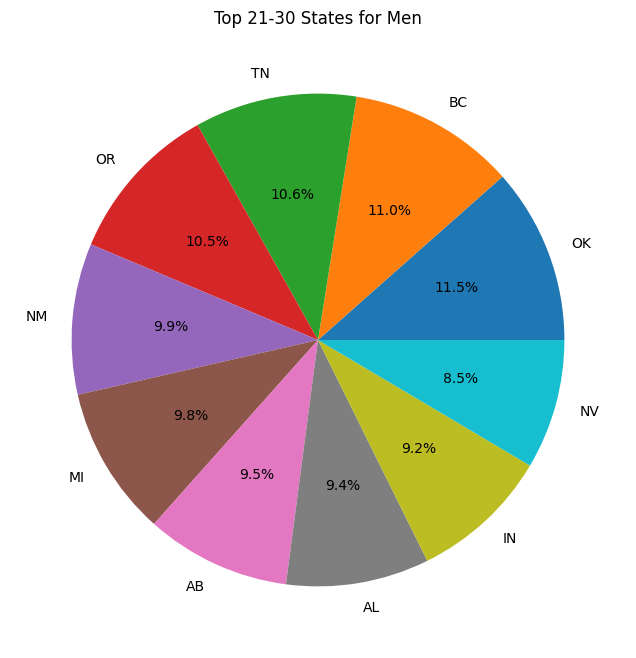

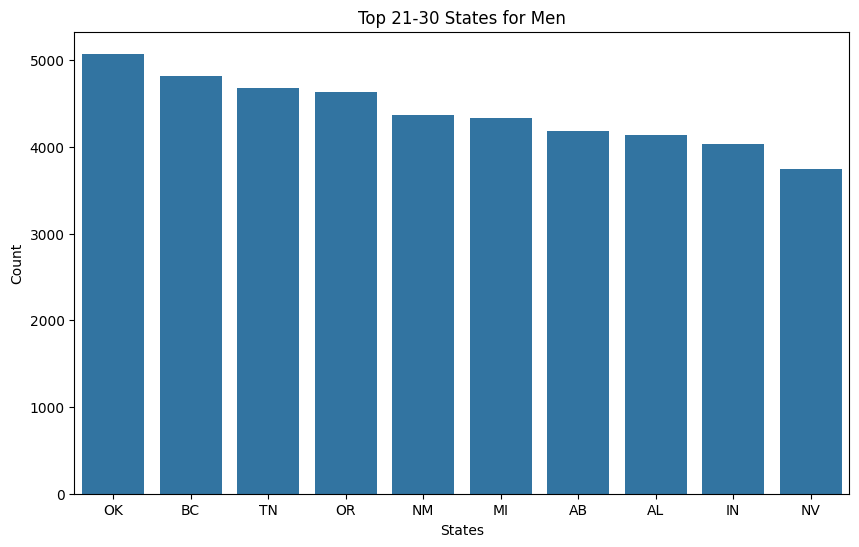

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 States for Men
top_states_men = df[df['Sex'] == 'M']['State'].value_counts().iloc[20:30]

# Pie Chart for Men (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(top_states_men, labels=top_states_men.index, autopct='%1.1f%%')
plt.title("Top 21-30 States for Men")
plt.show()

# Bar Chart for Men (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_men.index, y=top_states_men.values)
plt.title("Top 21-30 States for Men")
plt.xlabel("States")
plt.ylabel("Count")
plt.show()

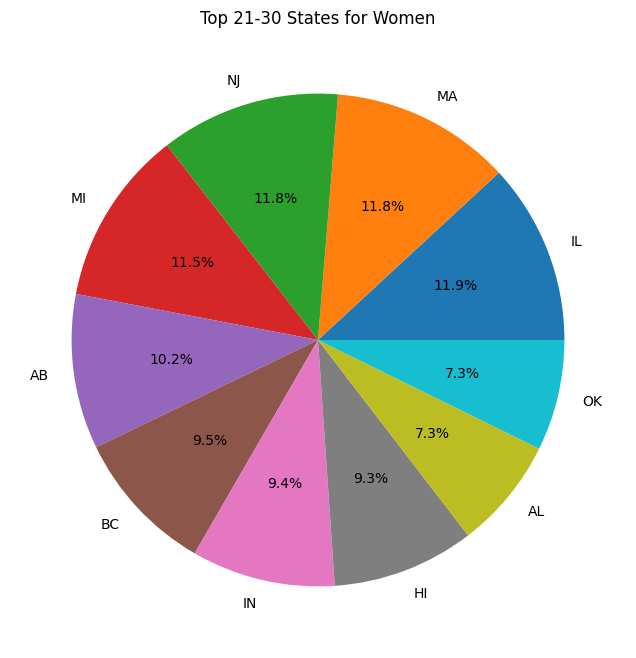

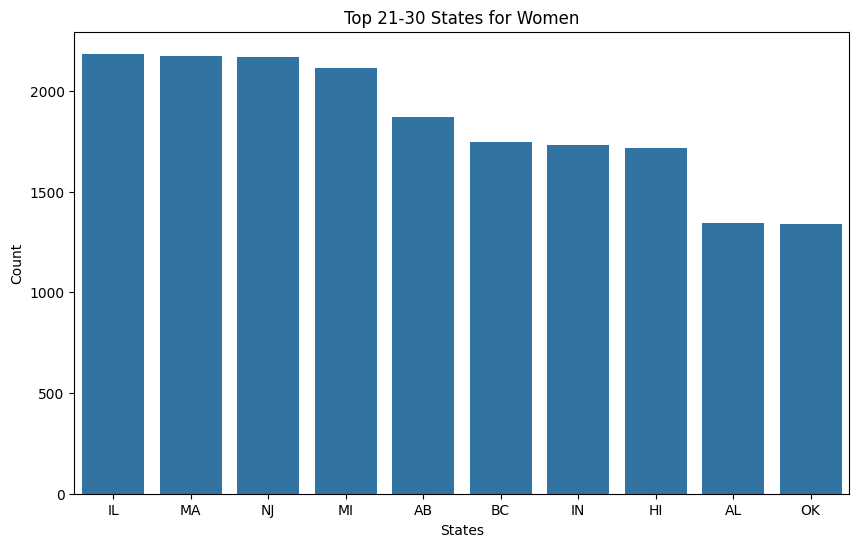

In [ ]:
top_states_women = df[df['Sex'] == 'F']['State'].value_counts().iloc[20:30]

# Pie Chart for Women (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(top_states_women, labels=top_states_women.index, autopct='%1.1f%%')
plt.title("Top 21-30 States for Women")
plt.show()

# Bar Chart for Women (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_women.index, y=top_states_women.values)
plt.title("Top 21-30 States for Women")
plt.xlabel("States")
plt.ylabel("Count")
plt.show()

In [ ]:
def top_states_by_year(sex, year, top_n=10):
    return df[(df['Sex'] == sex) & (df['birthyear'] == year)] \
            .groupby('State').size() \
            .sort_values(ascending=False).head(top_n)

# Get Top 10 States for Men and Women in 2021
top_10_states_men_2021 = top_states_by_year('M', 2021)
top_10_states_women_2021 = top_states_by_year('F', 2021)

# Function to Print Data in a Box
def print_in_box(title, data):
    border = '+' + '-' * (len(title) + 2) + '+'
    print(border)
    print(f"| {title} |")
    print(border)
    for state, count in data.items():
        print(f"| {state:<4} | {count:>5} |")
    print(border)

# Display the Results
print_in_box("Top 10 States for Men in 2021", top_10_states_men_2021)
print_in_box("Top 10 States for Women in 2021", top_10_states_women_2021)

KeyError: 'birthyear'

<ipython-input-15-244580f3d8ef>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Sex', 'Age Group']).size().unstack(fill_value=0)


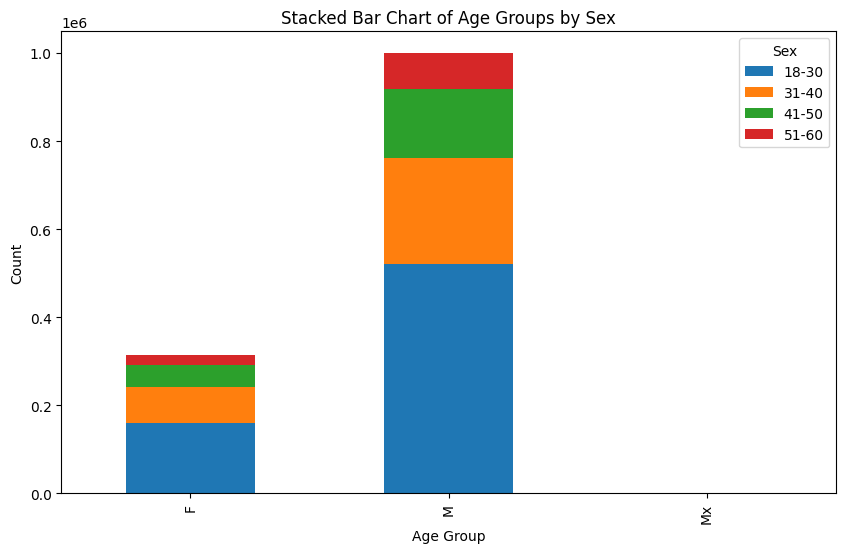

In [ ]:
# Define age bins
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']

# Add age group column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a pivot table
age_group_counts = df.groupby(['Sex', 'Age Group']).size().unstack(fill_value=0)

# Stacked Bar Chart
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Age Groups by Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


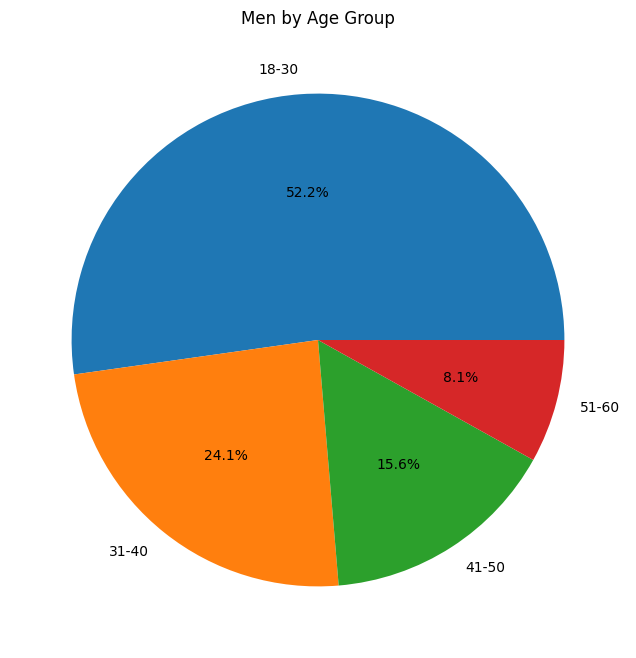

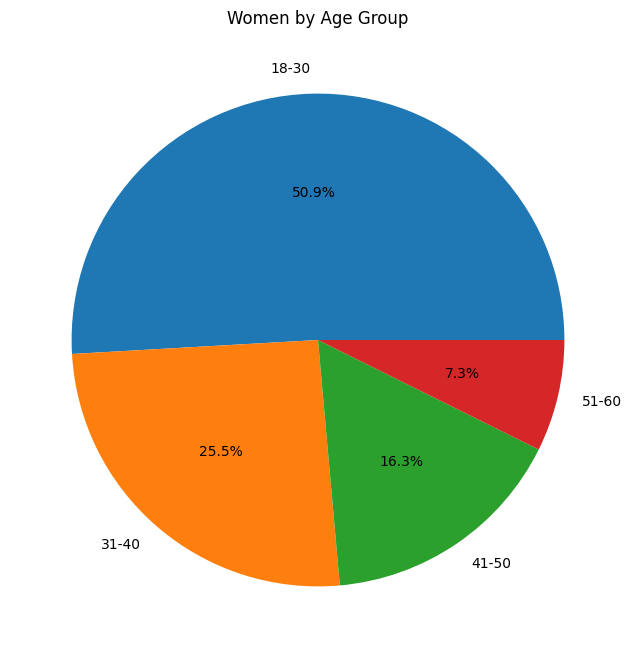

In [ ]:
# Age group distribution for men
age_group_dist_men = df[df['Sex'] == 'M']['Age Group'].value_counts()

# Pie Chart for Men (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(age_group_dist_men, labels=age_group_dist_men.index, autopct='%1.1f%%')
plt.title("Men by Age Group")
plt.show()

# Age group distribution for women
age_group_dist_women = df[df['Sex'] == 'F']['Age Group'].value_counts()

# Pie Chart for Women (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(age_group_dist_women, labels=age_group_dist_women.index, autopct='%1.1f%%')
plt.title("Women by Age Group")
plt.show()

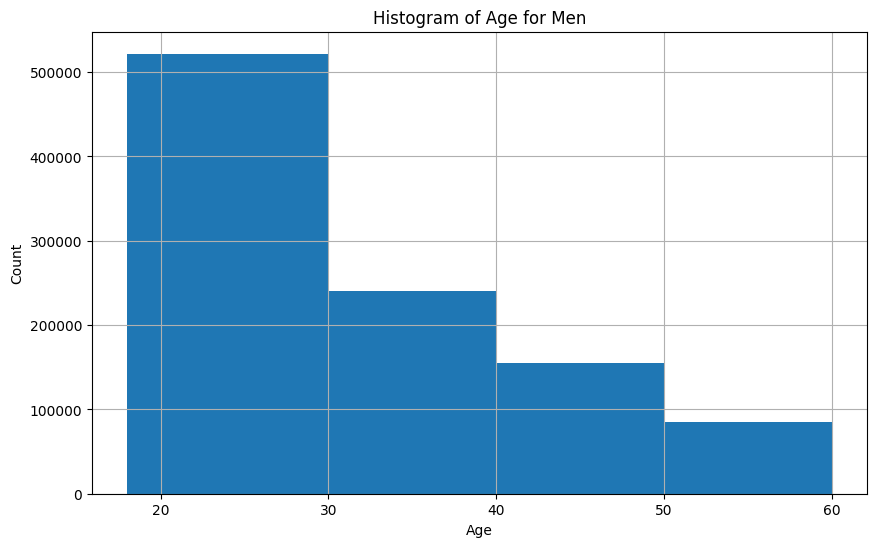

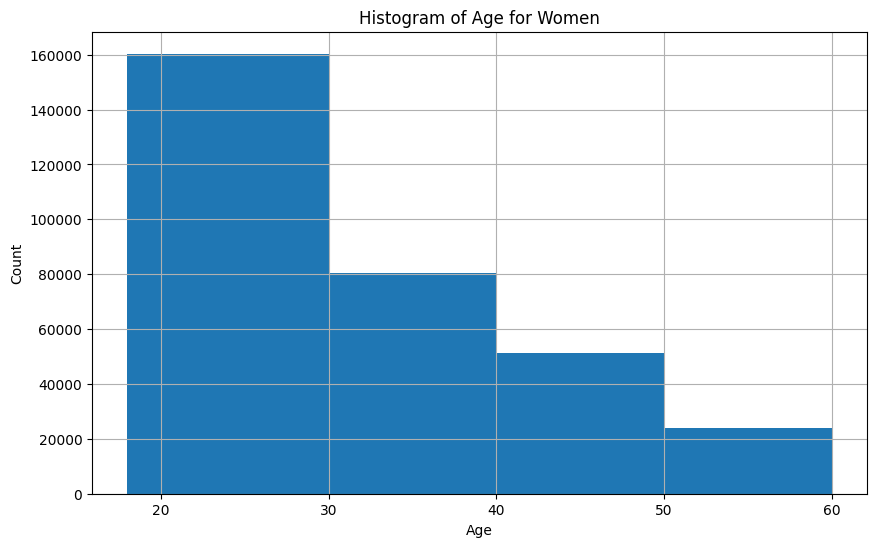

In [ ]:
# Histogram for Men by Age
plt.figure(figsize=(10, 6))
df[df['Sex'] == 'M']['Age'].dropna().hist(bins=bins)
plt.title('Histogram of Age for Men')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram for Women by Age
plt.figure(figsize=(10, 6))
df[df['Sex'] == 'F']['Age'].dropna().hist(bins=bins)
plt.title('Histogram of Age for Women')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
